In [1]:
from XRStools import xrs_read, xrs_extraction

 >>>>>>>>  use_PyMca  True
 >>>>>>>>  use_PyMca  True
/Users/katherinegraves/opt/miniconda3/envs/xrstools-test/lib/python2.7/site-packages/PyMca5/PyMcaGui/plotting/MaskImageWidget.pyc
 Could not load PyTango
 >>>>>>>>  use_PyMca  True
                                                                                
 ############################# Welcome to XRStools #############################
 # If you are using this software, please cite the following work:             #
 # Ch.J. Sahle, A. Mirone, J. Niskanen, J. Inkinen, M. Krisch, and S. Huotari: #
 # "Planning, performing, and analyzing X-ray Raman scattering experiments."   #
 # Journal of Synchrotron Radiation 22, No. 2 (2015): 400-409.                 #
 ###############################################################################
                                                                                


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
path = '/Users/katherinegraves/OneDrive - University of Leeds/PhD/Synchrotron/APS/Nov2019_NRIXS/XRSS/2019-11_20ID-APS/CNT-PS/'

In [4]:
myq = [2,5,8,9,10]

In [5]:
cnt = xrs_read.read_lerix(exp_dir=path,elastic_name='elastic',nixs_name='nixs',wide_name='wide')

In [6]:
cnt.load_elastics(analyzers=myq)
#get E0 and FWHM of peaks to be used in gaussian fitting script
# MAKE SURE TO SAVE TO DOCUMENT

Reading elastic scan:  elastic.0001
Reading elastic scan:  elastic.0002
Reading elastic scan:  elastic.0003
Reading elastic scan:  elastic.0004
Reading elastic scan:  elastic.0009
Reading elastic scan:  elastic.0010
Reading elastic scan:  elastic.0011
Reading elastic scan:  elastic.0012
Reading elastic scan:  elastic.0013
Reading elastic scan:  elastic.0014
Elastic scan is wrong shape, skipping
Reading elastic scan:  elastic.0015
Reading elastic scan:  elastic.0016
Running 'Update_Cenom' Script for analysers: [2, 5, 8, 9, 10]
E0 was found to be (keV):  9.89025515153
Average FWHM for the elastics is (eV):  0.505007070371
Analyzer08 Elastic peak is less than 100 counts, setting to average e0


In [7]:
# load all elastics, nixs and wides in one go
cnt.load_elastics(analyzers='all')
cnt.load_nixs()
cnt.load_wides()

Reading elastic scan:  elastic.0001
Reading elastic scan:  elastic.0002
Reading elastic scan:  elastic.0003
Reading elastic scan:  elastic.0004
Reading elastic scan:  elastic.0009
Reading elastic scan:  elastic.0010
Reading elastic scan:  elastic.0011
Reading elastic scan:  elastic.0012
Reading elastic scan:  elastic.0013
Reading elastic scan:  elastic.0014
Elastic scan is wrong shape, skipping
Reading elastic scan:  elastic.0015
Reading elastic scan:  elastic.0016
Running 'Update_Cenom' Script for All analysers
E0 was found to be (keV):  9.89036362323
Average FWHM for the elastics is (eV):  nan
Analyzer04 Elastic peak is less than 100 counts, setting to average e0
Analyzer08 Elastic peak is less than 100 counts, setting to average e0
Analyzer12 Elastic peak is less than 100 counts, setting to average e0
Analyzer13 Elastic peak is less than 100 counts, setting to average e0
Analyzer14 Elastic peak is less than 100 counts, setting to average e0
Analyzer19 Elastic peak is less than 100 c

In [8]:
cnt.join_nixs_wide(scaling='auto')

Successfully joined the wide and nixs scans.


In [9]:
# TEST ANALYSERS
# %matplotlib notebook
# plt.plot(cnt.eloss,cnt.signals[:,[4]]) #interactive plot window to look at each analyser output
# plt.show()

<IPython.core.display.Javascript object>


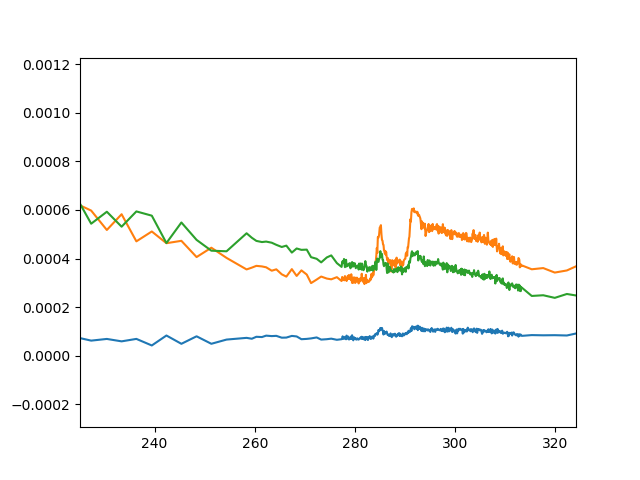

In [10]:
%matplotlib notebook
plt.plot(cnt.eloss,cnt.signals[:,[2,5,8]]) #interactive plot window to look at each analyser output
plt.show()

In [41]:
cnt.save_H5(H5name='PS_CNT_369_TAKE2')

ValueError: Unable to create group (name already exists)

In [54]:
cnt.update_cenom(analyzers='all')

Running 'Update_Cenom' Script for All analysers
E0 was found to be (keV):  9.89036362323
Average FWHM for the elastics is (eV):  nan
Analyzer04 Elastic peak is less than 100 counts, setting to average e0
Analyzer08 Elastic peak is less than 100 counts, setting to average e0
Analyzer12 Elastic peak is less than 100 counts, setting to average e0
Analyzer13 Elastic peak is less than 100 counts, setting to average e0
Analyzer14 Elastic peak is less than 100 counts, setting to average e0
Analyzer19 Elastic peak is less than 100 counts, setting to average e0


In [55]:
cnt_ex = xrs_extraction.edge_extraction(cnt,['C'],[1.0],{'C':['K']})

In [56]:
from XRStools import xrs_extraction

In [57]:
cnt_ex.analyzerAverage([2,5,8],errorweighing=False)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


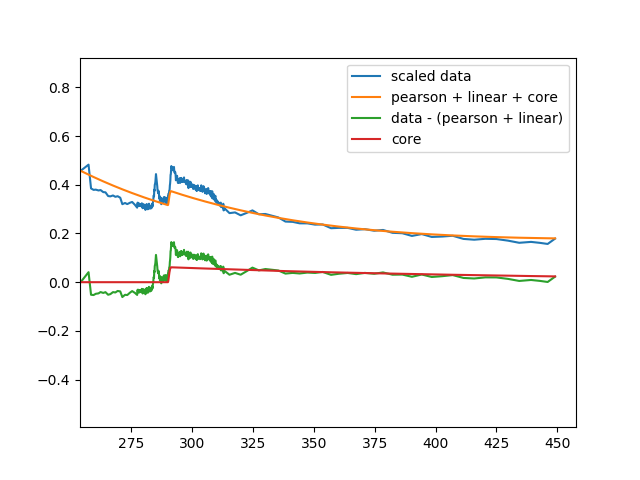

The fit parameters are:  [-3.21830171e+02  4.66054621e+02  6.98531102e+01  2.35331113e+01
  3.09114431e-04  3.04397504e-04  5.89410000e+00]


In [58]:
%matplotlib
cnt_ex.removeCorePearsonAv('C','K',[150,280.0],[330.0,450.0],weights=[2,1],HFcore_shift=5.6,scaling=5.9)

In [ ]:
cnt_ex.save_average_Sqw(os.path.join(path,'PSCNT_data[369]_extract_BETTERSUBTRACT.dat'), emin=275,emax=340)

In [23]:
cnt_ex.sqwav

array([-7.77152158e-02, -1.67075856e+00, -1.88301166e+00, -1.82140068e+00,
       -1.70266202e+00, -1.63345653e+00, -1.58166419e+00, -1.51479837e+00,
       -1.48204356e+00, -1.34954199e+00, -1.27305350e+00, -1.19127270e+00,
       -1.12213330e+00, -1.09187320e+00, -1.01330387e+00, -1.00120305e+00,
       -9.35672081e-01, -9.09215604e-01, -8.43457706e-01, -8.27171839e-01,
       -7.87877498e-01, -7.73447825e-01, -7.10691412e-01, -6.74516420e-01,
       -6.51493383e-01, -5.88682498e-01, -5.47202835e-01, -5.06087598e-01,
       -4.64772268e-01, -4.42073893e-01, -4.12172159e-01, -4.01663127e-01,
       -3.67713715e-01, -3.84849219e-01, -3.38042139e-01, -3.25396885e-01,
       -3.03457834e-01, -2.84674233e-01, -2.79149063e-01, -2.61662446e-01,
       -2.35783842e-01, -2.20033970e-01, -2.27344761e-01, -2.19951276e-01,
       -2.06975362e-01, -2.04279147e-01, -2.27274074e-01, -1.83128734e-01,
       -1.64801973e-01, -1.75234752e-01, -1.34257258e-01, -1.54936892e-01,
       -1.49012273e-01, -